In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 회귀 트리(Regression Tree)

- 트리 기반의 회귀 알고리즘
- 트리 생성 방식은 분류 트리와 같으나, 리프 노드에서 예측 결정 값을 만드는 과정이 다름
    - 리프 노드에 속하는 데이터 값의 평균값을 구해 회귀 예측값으로 결정

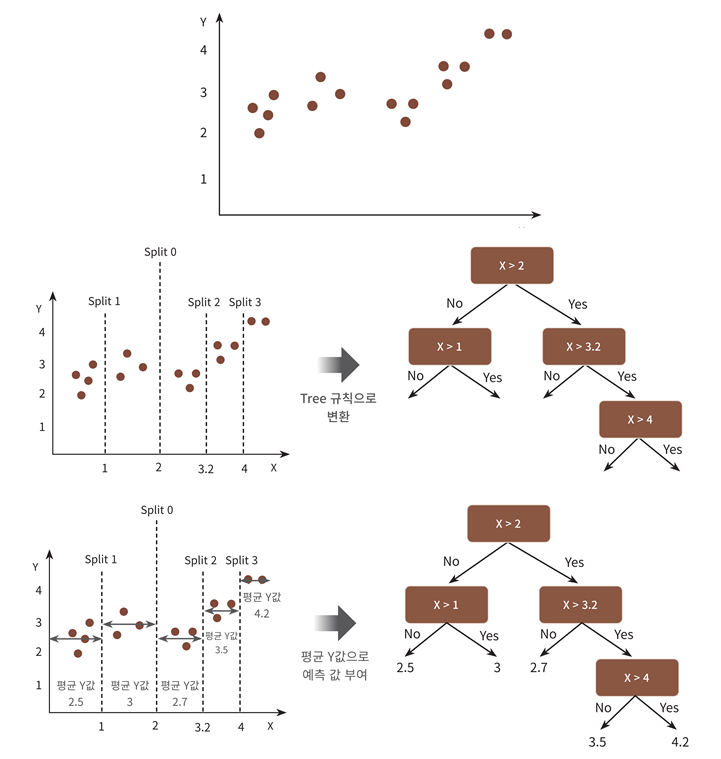

### 사이킷런의 회귀를 위한 결정 트리 기반의 클래스들

- 결정트리, 랜덤포레스트, GBM, XGBoost, LightGBM 모두 회귀 분석 가능

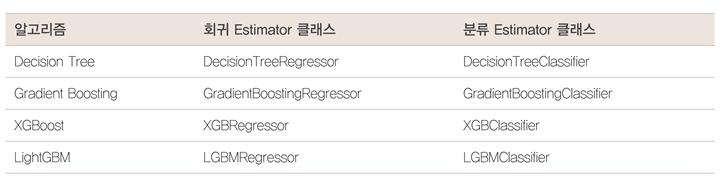

--------------------------------

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## 실습. 보스턴 주택 가격 예측

### 보스턴 주택가격 데이터 세트 로드

In [3]:
boston = pd.read_csv('boston.csv')
boston.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### features & target

In [4]:
X = boston.drop('price',axis=1)
y = boston['price']

In [5]:
import sys
sys.path.append('mymodule')
from mymodule.regrModels import regr_cv_modeling

In [6]:
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
regr_cv_modeling(rf, X, y)

RandomForestRegressor(n_estimators=1000, random_state=0):5-fold CV
Negative MSE: [ -7.883 -13.143 -20.574 -46.226 -18.878]
RMSEs: [2.8076 3.6253 4.5358 6.799  4.3449], Average RMSE:4.4225


(array([2.80764971, 3.62534618, 4.5358454 , 6.7989607 , 4.34489293]),
 np.float64(4.422538982804892))

### 교차검증 및 예측 성능 출력 함수 작성

### 모델1. 랜덤포레스트

### 모델2. 다양한 유형의 회귀트리 모델을 이용한 보스턴 주택 가격 예측

- 의사결정트리(DecisionTreeRegressor)
- 부스팅
    - GradientBoostingRegressor
    - XGBRegressor
    - LGBMRegressor

In [7]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [8]:
dt = DecisionTreeRegressor(max_depth=4, random_state=0)
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
gb = GradientBoostingRegressor(n_estimators=1000, random_state=0)
xgb = XGBRegressor(n_estimators=1000)
lgb = LGBMRegressor(n_estimators=1000)

scores_df = pd.DataFrame()
for model in [dt, rf, gb, xgb, lgb]:
    rmses, avg_rmse = regr_cv_modeling(model, X, y)
    score = pd.Series({'RMSEs':rmses, 'Avg_RMSE':avg_rmse})
    model_name = model.__class__.__name__
    scores_df[model_name] = score
    print('======================================================\n')

DecisionTreeRegressor(max_depth=4, random_state=0):5-fold CV
Negative MSE: [-11.942 -36.253 -29.634 -47.226 -65.564]
RMSEs: [3.4557 6.0211 5.4437 6.8721 8.0971], Average RMSE:5.9780

RandomForestRegressor(n_estimators=1000, random_state=0):5-fold CV
Negative MSE: [ -7.883 -13.143 -20.574 -46.226 -18.878]
RMSEs: [2.8076 3.6253 4.5358 6.799  4.3449], Average RMSE:4.4225

GradientBoostingRegressor(n_estimators=1000, random_state=0):5-fold CV
Negative MSE: [ -7.516 -14.515 -19.57  -39.449 -16.72 ]
RMSEs: [2.7415 3.8099 4.4238 6.2808 4.089 ], Average RMSE:4.2690

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None

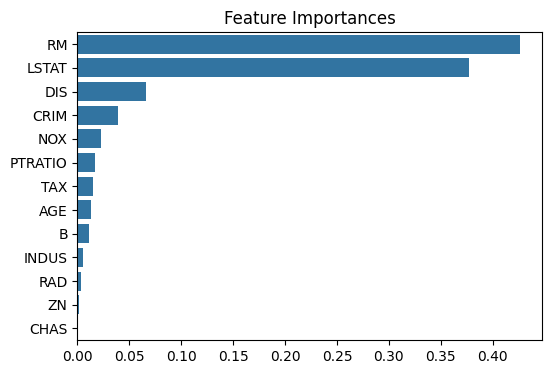

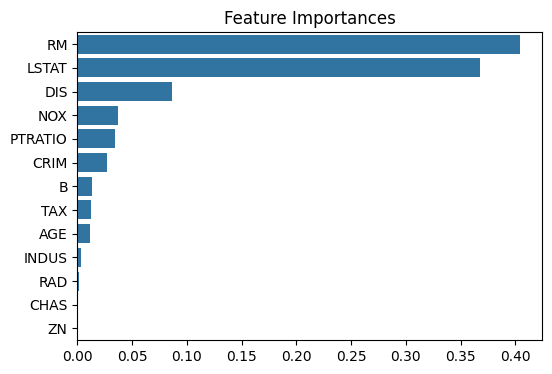

In [9]:
from mymodule.dtVisual import plot_ftr_importances


for model in [rf, gb]:
    model.fit(X,y)
    plot_ftr_importances(model, feature_names=X.columns)

**회귀트리의 피처변수별 중요도**
- Regressor 클래스는 회귀계수 제공 속성 coef_ 가 없음
- 대신 feature_importances_를 이용해 피처별 중요도 제공

In [10]:
scores_df.T

,RMSEs,Avg_RMSE
DecisionTreeRegressor,"[3.455732453965519, 6.021074829990241, 5.44372...",5.977957
RandomForestRegressor,"[2.8076497053655394, 3.6253461781170806, 4.535...",4.422539
GradientBoostingRegressor,"[2.7414937385368603, 3.809861972089468, 4.4237...",4.268998
XGBRegressor,"[2.9298572936525695, 5.44690668070298, 5.12698...",4.959252
LGBMRegressor,"[2.9931790071200104, 4.310150005677497, 4.1296...",4.646441


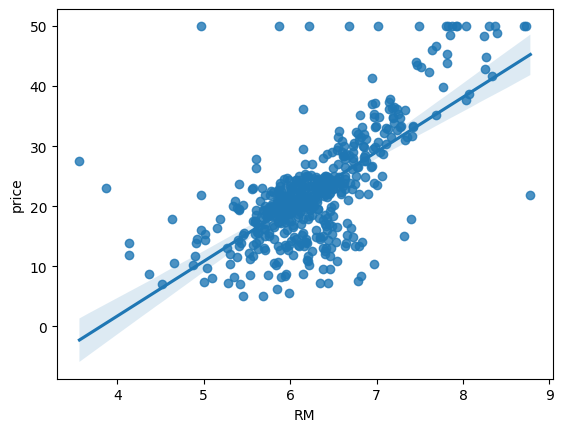

In [11]:
sns.regplot(data=boston, x='RM', y='price')
plt.show()

Text(0.5, 1.0, 'Sample Boston: RM * price')

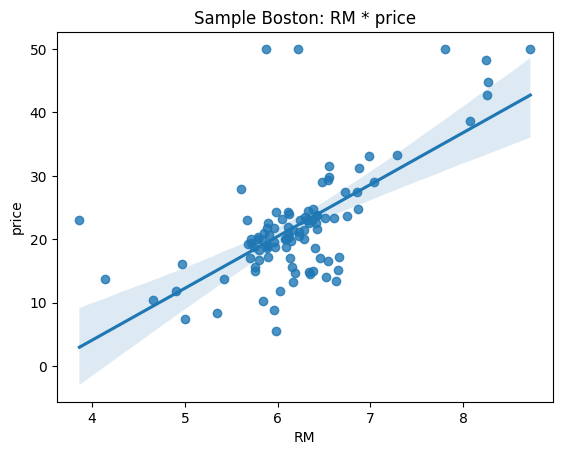

In [13]:
data_sample = boston.sample(n=100, random_state=0)
sns.regplot(data_sample, x='RM', y='price')
plt.title('Sample Boston: RM * price')

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X_train = sample.RM.values.reshape(-1,1)
y_train = sample.price.values.reshape(-1,1)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)
lr = LinearRegression()
dt2 = DecisionTreeRegressor(max_depth=2)
dt4 = DecisionTreeRegressor(max_depth=4)
dt7 = DecisionTreeRegressor(max_depth=7)

lr.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt4.fit(X_train, y_train)
dt7.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pred_dt2 = dt2.predict(X_test)
pred_dt4 = dt4.predict(X_test)
pred_dt7 = dt7.predict(X_test)

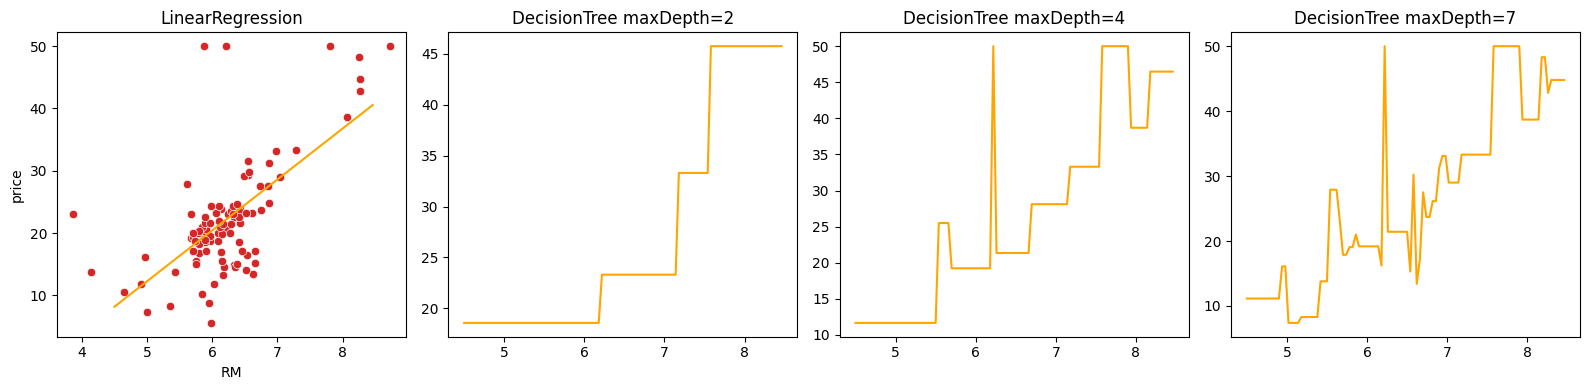

In [17]:
fig, axs = plt.subplots(figsize=(16,4), ncols=4)

sns.scatterplot(data=sample, x='RM', y='price', ax=axs[0])
axs[0].plot(X_test,pred_lr, 'orange')
axs[0].set_title('LinearRegression')

sns.scatterplot(data=sample, x='RM', y='price', ax=axs[0])
axs[1].plot(X_test,pred_dt2, 'orange')
axs[1].set_title('DecisionTree maxDepth=2')

sns.scatterplot(data=sample, x='RM', y='price', ax=axs[0])
axs[2].plot(X_test,pred_dt4, 'orange')
axs[2].set_title('DecisionTree maxDepth=4')

sns.scatterplot(data=sample, x='RM', y='price', ax=axs[0])
axs[3].plot(X_test,pred_dt7, 'orange')
axs[3].set_title('DecisionTree maxDepth=7')

plt.tight_layout()
plt.show()


### 모델3. 주택가격 데이터 셋에서  'RM' 변수와 'PRICE' 변수 만 선택하여 단순회귀분석

- 독립변수 : 'RM' (거주할 수 있는 방의 수)
- 종속변수 : 'PRICE' (주택 가격)
- 데이터 개수 : 100

#### 데이터셋 생성

In [18]:
df_ohe.columns

NameError: name 'df_ohe' is not defined

In [ ]:
ages = [5,10,30,50,60]
pd.DataFrame({'age':ages,
              'sibsp' : })

**회귀트리로 주택가격 예측**

**에측한 회귀직선 시각화**

-----------